### 5. Reguralized logistic regression
##### 1. 9 classifiers of degree 1-9

C=10 000
Deg 1 training errors:  53
Deg 2 training errors:  17
Deg 3 training errors:  18
Deg 4 training errors:  19
Deg 5 training errors:  15
Deg 6 training errors:  16
Deg 7 training errors:  15
Deg 8 training errors:  15
Deg 9 training errors:  15


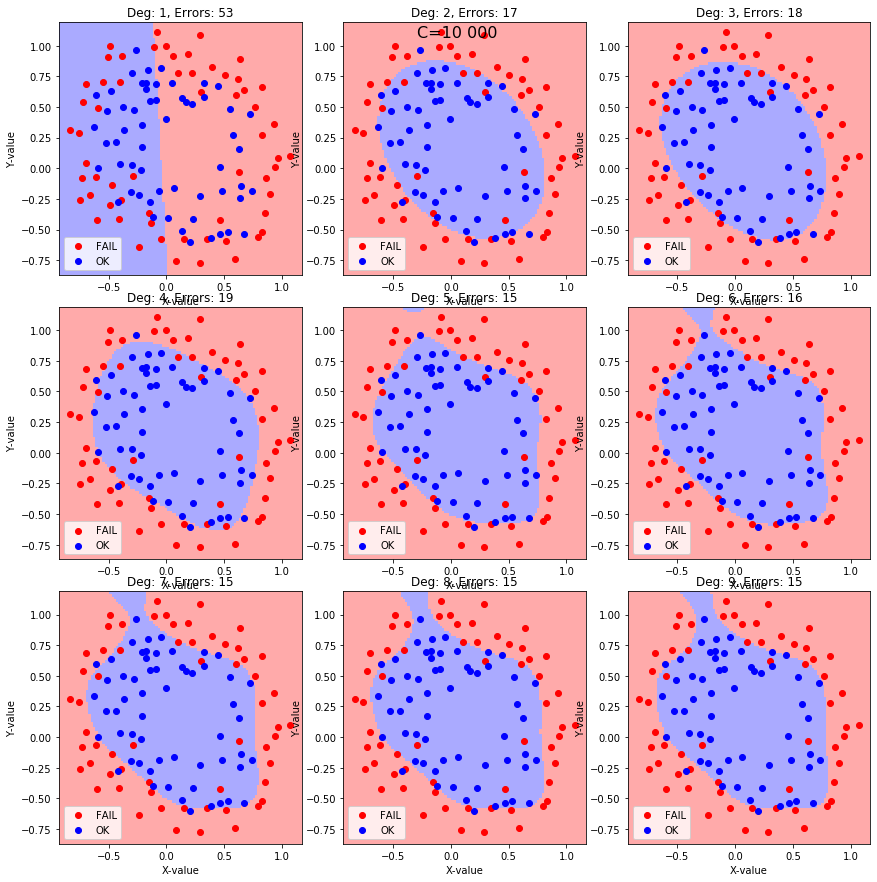

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import path
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
import util

data = np.genfromtxt(path.join('data/microchips.csv'), delimiter=',', dtype=float)

failed = list(filter(lambda chip: chip[2] == 0, data))
ok = list(filter(lambda chip: chip[2] == 1, data))

# Filter datapoints
x_f, y_f, z_f = list(zip(*failed))
x_ok, y_ok, z_ok = list(zip(*ok))

X = np.array([data[:, 0], data[:, 1]]).T
y = np.array([data[:, 2]]).T

err_reg = []
err_nonreg = []
print("C=10 000")
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
figure.suptitle("C=10 000", fontsize=16)
figure.subplots_adjust(top=0.88)
figure.tight_layout()

for idx in range(1, 10):
    ax = plt.subplot(3, 3, idx)
    Xe = util.mapFeature(X[:, 0], X[:, 1], idx)
    logreg = LogisticRegression(C=10000.0, tol=1e-6, max_iter=20000)
    model_nonreg = logreg.fit(Xe, y.ravel())  # Ravel y into (n_samples,) vector and fit to model
    y_pred = cross_val_predict(logreg, Xe, y.ravel())
    errors = np.sum(y_pred.reshape(-1, 1) != y)
    err_nonreg.append(errors)
    y_pred = logreg.predict(Xe)
    errors = np.sum(y_pred.reshape(-1, 1) != y)
    print(f'Deg {idx} training errors: ', errors)

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Mesh Grid
    x1, x2 = xx.ravel(), yy.ravel()
    XXe = util.mapFeature(x1, x2, idx)  # Turn to two Nx1 arrays
    p = logreg.predict(XXe)  # classify mesh ==> probabilities
    classes = p > 0.5  # round off probabilities
    clz_mesh = classes.reshape(xx.shape)  # return to mesh format
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # mesh plot
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # colors
    ax.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
    ax.scatter(x_f, y_f, color='r')

    plt.xlabel('X-value')
    plt.ylabel('Y-value')
    ax.set_title(f"Deg: {idx}, Errors: {errors}")
    ax.scatter(x_ok, y_ok, color='b')
    ax.legend(['FAIL', 'OK'])
plt.show()

##### 1.2 Redo exercise 1.1 with C = 1

##### Difference?

The difference is that C=1 is more constrained or reguralized than C=10k which means that C1 isnt overfitting
as much. By using a smaller C value the model (which uses lbfgs solver) will shrink the co-efficients towards zero
resulting in more constraint and none of the fit "breakouts" as seen in C10k plots.

C=1
Deg 1 training errors:  54
Deg 2 training errors:  22
Deg 3 training errors:  23
Deg 4 training errors:  21
Deg 5 training errors:  19
Deg 6 training errors:  20
Deg 7 training errors:  20
Deg 8 training errors:  20
Deg 9 training errors:  20


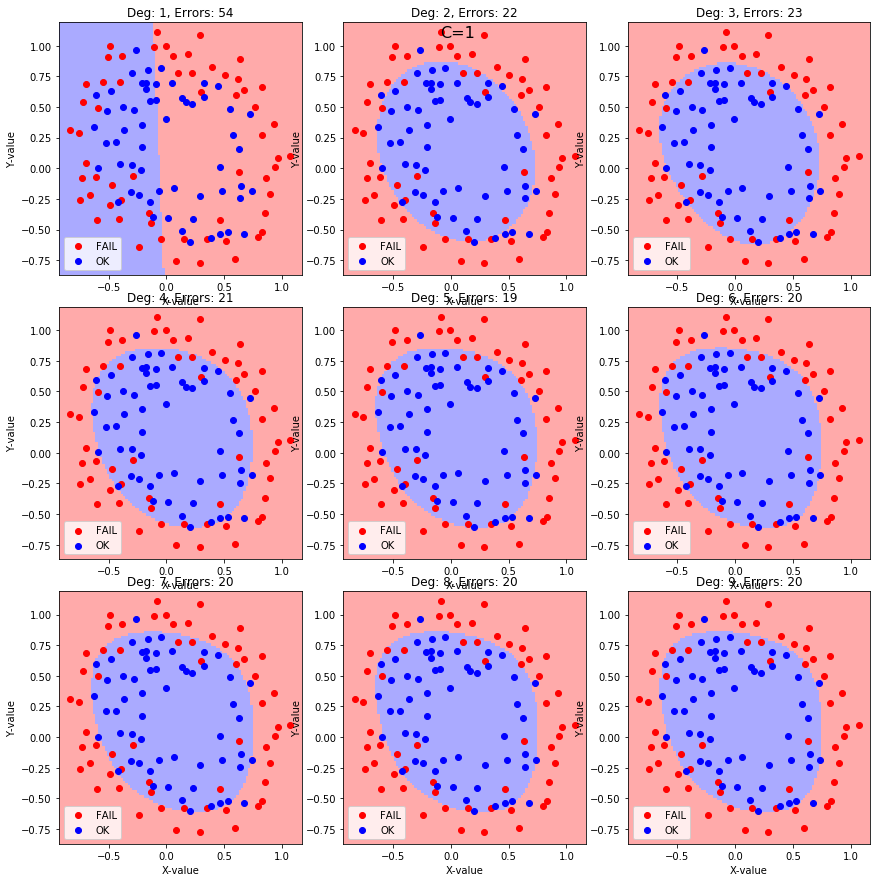

In [3]:
print("C=1")
figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
figure.subplots_adjust(top=0.88)
figure.tight_layout()
figure.suptitle("C=1", fontsize=16)
for idx in range(1, 10):
    ax = plt.subplot(3, 3, idx)
    Xe = util.mapFeature(X[:, 0], X[:, 1], idx)
    logreg = LogisticRegression(C=1.0, tol=1e-6, max_iter=20000)
    logreg.fit(Xe, y.ravel())  # Ravel y into (n_samples,) vector and fit to model
    y_pred = cross_val_predict(logreg, Xe, y.ravel())
    errors = np.sum(y_pred.reshape(-1, 1) != y)
    err_reg.append(errors)
    y_pred = logreg.predict(Xe)
    errors = np.sum(y_pred.reshape(-1, 1) != y)
    print(f'Deg {idx} training errors: ', errors)

    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # Mesh Grid
    x1, x2 = xx.ravel(), yy.ravel()
    XXe = util.mapFeature(x1, x2, idx)  # Turn to two Nx1 arrays
    p = logreg.predict(XXe)  # classify mesh ==> probabilities
    classes = p > 0.5  # round off probabilities
    clz_mesh = classes.reshape(xx.shape)  # return to mesh format
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # mesh plot
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # colors
    ax.pcolormesh(xx, yy, clz_mesh, cmap=cmap_light)
    ax.scatter(x_f, y_f, color='r')

    plt.xlabel('X-value')
    plt.ylabel('Y-value')
    ax.set_title(f"Deg: {idx}, Errors: {errors}")
    ax.scatter(x_ok, y_ok, color='b')
    ax.legend(['FAIL', 'OK'])
plt.show()

##### 1.3 Cross validation

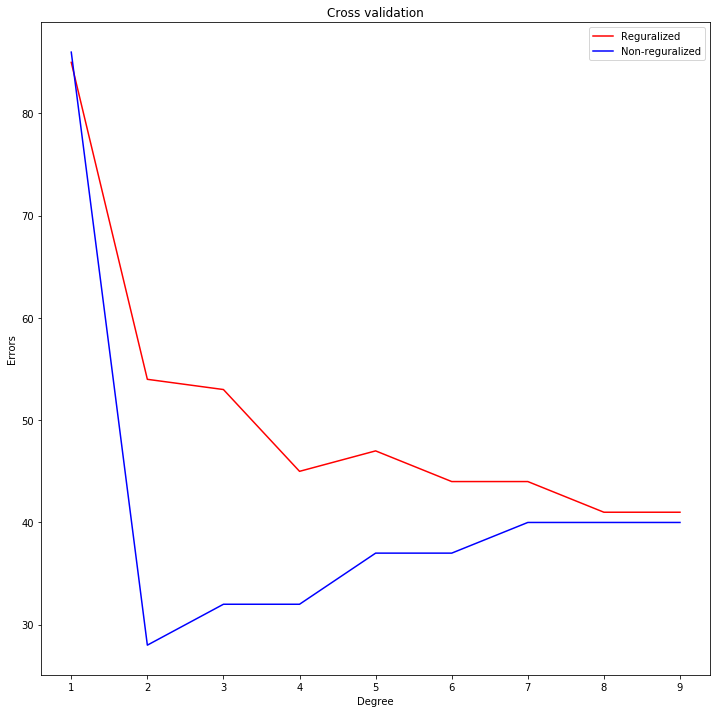

In [4]:
# Cross validation
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
figure.subplots_adjust(top=0.88)
plt.plot(range(1, 10), err_reg, color='red')
plt.plot(range(1, 10), err_nonreg, color='blue')
plt.legend(['Reguralized', 'Non-reguralized'])
plt.title("Cross validation")
plt.xlabel('Degree')
plt.ylabel('Errors')
plt.show()
